In [99]:
from pylab import *
import copy

Probemos buscar el mínimo de la función

$$ f(x, y) = \frac{1}{2} (a x^2 + b y^2) $$

Gradiente de f

$$ [ax,by]^T$$

In [110]:
def test_fn(r, a, b):
  return 0.5*(a*r[0]**2 + b*r[1]**2)

def grad(r, a, b): # r es el vector de puntos
  return [a*r[0], b*r[1]]

aa = 1.0  # arbitrario elijo un a copado ==> a=1
bb = 0.1  # el problema pide b<1
xx = np.linspace(-2*bb, 0.5, num=100)
yy = np.linspace(-bb, 1 + bb, num=200)
X, Y = np.meshgrid(xx, yy, indexing='ij')
rr = np.array([[(x, y) for x in xx] for y in yy])


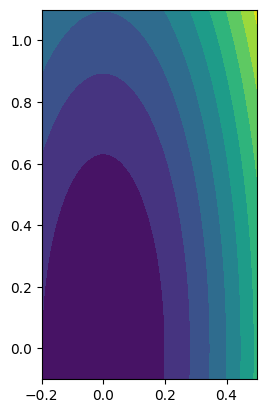

In [111]:
contourf(X, Y, test_fn([X, Y], aa, bb), levels=10)
gca().set_aspect('equal')

Realizamos el proceso iterativo

$$ \mathbf{x}_{k+1} = \mathbf{x}_k - s \nabla f (\mathbf{x}_k) $$

In [118]:
Nsteps = 30
step = 2.0/(1+bb)  # Elegido con el criterio de exact line search
xk = np.zeros(Nsteps+1)
yk = np.zeros(Nsteps+1)

xk[0] = bb     # este Xk[0] es arbitrario?
yk[0] = 1.0    # idem este Yk[0] es arbitrario? 


for ii in range(Nsteps):
  xk[ii+1] = xk[ii] - step*grad((xk[ii], yk[ii]), aa, bb)[0]
  yk[ii+1] = yk[ii] - step*grad((xk[ii], yk[ii]), aa, bb)[1]

x_gd = copy.copy(xk)
y_gd = copy.copy(yk)



In [102]:
ncond=np.linalg.cond([[1,1],[3,2]])
print(ncond)

14.933034373659261


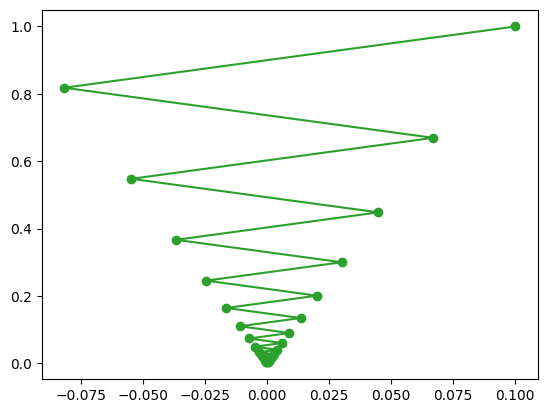

In [119]:
#contourf(X, Y, test_fn([X, Y], aa, bb), levels=15)
#plot(xk, yk, color='C3', marker='o')
plot(x_gd, y_gd, color='C2', marker='o')
#gca().set_aspect('equal')

In [17]:
import numpy as np

# Parámetro de la función
b = 10

# Definimos la función
def f(x):
    return 0.5 * (x[0]**2 + b * x[1]**2)

# Gradiente de la función
def grad_f(x):
    return np.array([x[0], b * x[1]])

# Exact line search para encontrar el mejor alpha en la dirección -grad
def exact_line_search(x, d):
    # f(x - alpha * d) = 0.5 * ((x0 - alpha * d0)^2 + b*(x1 - alpha * d1)^2)
    # Derivada con respecto a alpha, igualamos a 0 y despejamos alpha:
    numerator = np.dot(grad_f(x), d)
    denominator = d[0]**2 + b * d[1]**2
    return numerator / denominator

# Descenso por gradiente con exact line search
def gradient_descent_exact_line_search(x0, tol=1e-6, max_iter=30):
    x = x0.copy()
    for i in range(max_iter):
        g = grad_f(x)
        if np.linalg.norm(g) < tol:
            print(f"Convergencia alcanzada en {i} iteraciones")
            break
        d = -g
        alpha = exact_line_search(x, d)
        x = x + (-alpha) * g
    return x

# Punto inicial
x0 = np.array([5.0, 5.0])  # Puedes cambiarlo

# Ejecutar el algoritmo
xmin = gradient_descent_exact_line_search(x0)
print("Mínimo encontrado en:", xmin)
print("Valor mínimo de la función:", f(xmin))


Mínimo encontrado en: [8.73490542e+01 5.40328659e+09]
Valor mínimo de la función: 1.45977529962763e+20


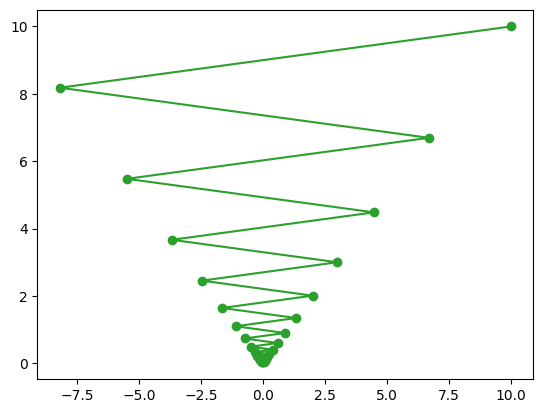

In [96]:
numero_pasos=30

a=1
b=0.1
gradiente=[a,b]

def evaluar_gradiente(vector):
    return [vector[0]*gradiente[0],vector[1]*gradiente[1]]

x=[1,1]
alpha=2/(1+b) ## lo elegimos asi porque exat line search lo prompone, podemos usar otro y ver que pasa

# Genero el espacio a recorrer, como se que esta cerca de cero tomo puntos cercanos

xx = np.linspace(-2*b, 0.5, num=100)    # como bb es pequeño entonces va desde -1 a 0.5
yy = np.linspace(-b, 1 + bb, num=200)   # va desde 0 a 1 

xk_gd = np.zeros(Nsteps+1)
yk = np.zeros(Nsteps+1)
fk = np.zeros(Nsteps+1)

xk[0]=10
yk[0]=10
for i in range(numero_pasos):
    xk[i+1]=xk[i]- alpha*evaluar_gradiente([xk[i],yk[i]])[0]
    yk[i+1]=yk[i]- alpha*evaluar_gradiente([xk[i],yk[i]])[1]

plot(xk, yk, color='C2', marker='o')

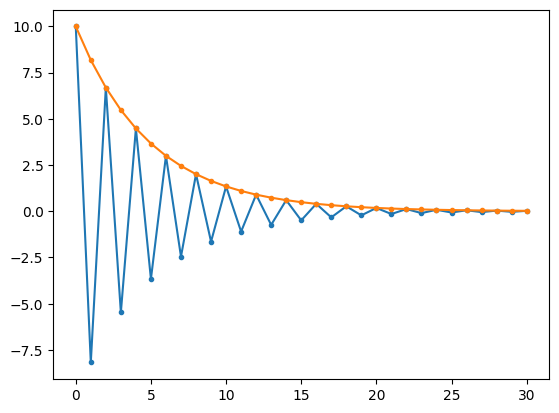

In [97]:
plot(xk, marker='.')
plot(yk, marker='.')

Ahora usamos su variante con momentum

  $$
    X_{k+1}=X_{k} - \alpha \nabla f(X_k) + \beta * (X_k-X_{k-1})
  $$

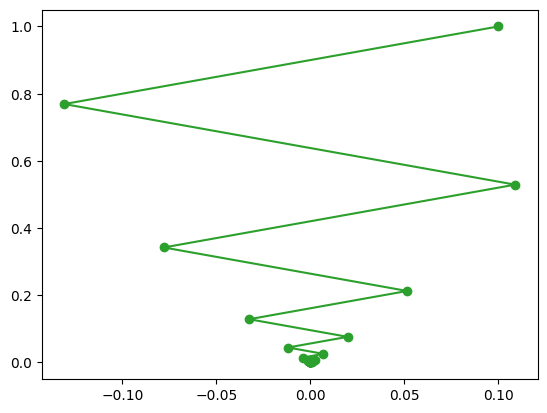

In [128]:
#necesito guardarme el X_{k-1}
numero_pasos=30
b=0.1
a=1
gradiente=[a,b]

def evaluar_gradiente(vector):
    return [vector[0]*gradiente[0],vector[1]*gradiente[1]]


##alpha=2/(1+b) ## lo elegimos asi porque exat line search lo prompone, podemos usar otro y ver que pasa
##beta=0.1

alpha = (2.0/(1+np.sqrt(b)))**2
beta = ((1-np.sqrt(bb))/(1+np.sqrt(b)))**2
# Genero el espacio a recorrer, como se que esta cerca de cero tomo puntos cercanos

xk = np.zeros(numero_pasos+1)
yk = np.zeros(numero_pasos+1)

xk[0]=b
yk[0]=1

xk[1]=xk[0]- alpha*evaluar_gradiente([xk[0],yk[0]])[0] 
yk[1]=yk[0]- alpha*evaluar_gradiente([xk[0],yk[0]])[1]

for i in range(1,numero_pasos):
    xk[i+1]=xk[i]- alpha*evaluar_gradiente([xk[i],yk[i]])[0] + beta * (xk[i]-xk[i-1])
    yk[i+1]=yk[i]- alpha*evaluar_gradiente([xk[i],yk[i]])[1] + beta * (yk[i]-yk[i-1])


plot(xk, yk, color='C2', marker='o')

Cuando b es muy cercano a 1 entonces es muy cercano a (a=1) y converge rapidamente

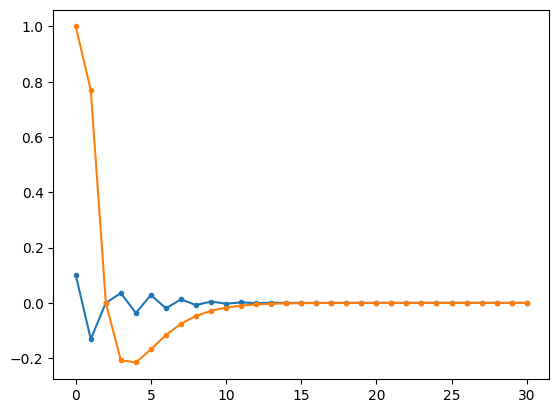

In [122]:
plot(xk, marker='.')
plot(yk, marker='.')

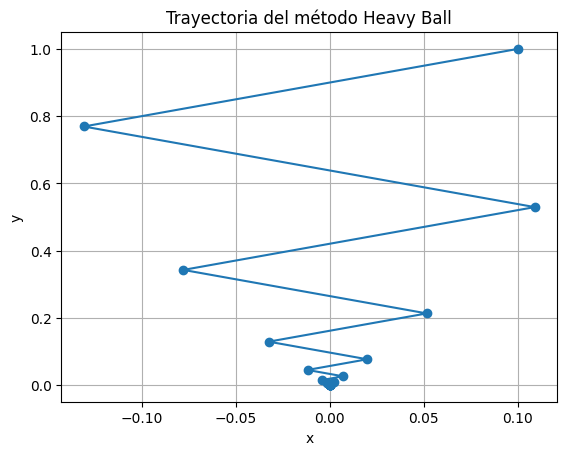

In [123]:
import numpy as np
import matplotlib.pyplot as plt

numero_pasos = 30
b = 0.1
a = 1
gradiente = [a, b]

def evaluar_gradiente(vector):
    return [vector[0] * gradiente[0], vector[1] * gradiente[1]]

alpha = (2.0 / (1 + np.sqrt(b)))**2
beta = ((1 - np.sqrt(b)) / (1 + np.sqrt(b)))**2

xk = np.zeros(numero_pasos + 1)
yk = np.zeros(numero_pasos + 1)

xk[0] = b
yk[0] = 1

xk[1] = xk[0] - alpha * evaluar_gradiente([xk[0], yk[0]])[0]
yk[1] = yk[0] - alpha * evaluar_gradiente([xk[0], yk[0]])[1]

for i in range(1, numero_pasos):
    xk[i+1] = xk[i] - alpha * evaluar_gradiente([xk[i], yk[i]])[0] + beta * (xk[i] - xk[i-1])
    yk[i+1] = yk[i] - alpha * evaluar_gradiente([xk[i], yk[i]])[1] + beta * (yk[i] - yk[i-1])

plt.plot(xk, yk, marker='o')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Trayectoria del método Heavy Ball")
plt.grid(True)
plt.show()
